### K-Nearest Neighbor Algorithmus:

#### Parameter:  

dataset = (X, Y)  
mit X := Features  
und Y := Classes  

K := Hyperparameter für die nächsten k Nachbarn  
sample := Neuer Datenpunkt zum Klassifizieren 

#### Pseudo-Code:

kNN (dataset, K, sample):  
  - Bestimme von jedem Punkt $p \in dataset$ die Distanz, mit der geg. Distanzfunktion.
  - Bestimme die $K$ nächst gelegenen Nachbarn und bestimme die zugehörige Klasse von $sample$.  

In [3]:
import numpy as np

def generate_dataset():
    cov = np.array([[1, 0], [0, 1]])
    data1 = np.random.multivariate_normal(np.array([0, 0]), cov, 10)
    data2 = np.random.multivariate_normal(np.array([-10, 4]), cov, 6)
    data3 = np.random.multivariate_normal(np.array([10, 10]), cov, 13)
    data = np.concatenate((data1, data2, data3), axis=0)
    classes = np.array([0 for i in range(10)] + [1 for i in range(6)] + [2 for i in range(13)])
    return data, classes

In [4]:
dataset, classes = generate_dataset()

In [5]:
print("Dataset and Classes!")
print(dataset)
print(classes)

Dataset and Classes!
[[  0.0921622    0.23579085]
 [  0.62153653  -0.3278358 ]
 [  1.01016889   1.53341789]
 [ -0.5974727   -1.2460667 ]
 [ -1.06840366  -1.06037601]
 [ -2.37499364   1.10729724]
 [ -0.26901988   2.00168539]
 [ -1.47351884  -0.70147166]
 [  0.65776111  -0.12152586]
 [ -0.46560795   0.82609124]
 [ -8.71774023   3.94064441]
 [ -7.74184519   5.35124037]
 [-12.05317391   4.41906967]
 [-10.07444075   3.60719128]
 [ -9.75763364   3.96910718]
 [-10.74353821   4.31241612]
 [  9.28240479  10.03659292]
 [ 10.31256003  11.12969897]
 [ 11.59297297   9.8648735 ]
 [ 11.61597891   9.74361956]
 [ 10.29645922  10.16904074]
 [  8.53994804   8.81148286]
 [  9.04569404   9.12691126]
 [ 10.35381452  10.70795977]
 [ 12.31867561   9.00990326]
 [  9.91443079  11.45201178]
 [  8.84839068   9.44976941]
 [  9.96961131   9.57154497]
 [ 10.19232414   8.65959813]]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [6]:
import matplotlib.pyplot as plt

def plot_dataset(dataset, classes):
    colors = ["red", "blue", "green"]
    for index, point in enumerate(dataset):
        plt.scatter(point[0], point[1], color=colors[classes[index]])
    plt.show()

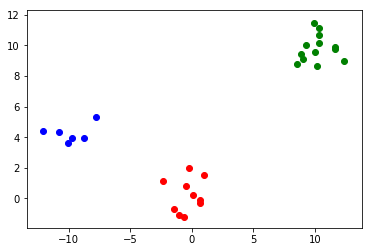

In [7]:
plot_dataset(dataset, classes)

In [8]:
def distance(p1, p2):
    distance = np.linalg.norm(p1 - p2)
    return distance

In [39]:
def vote(neighbours, num_classes):
    votes = [0 for i in range(num_classes)]
    for neigh in neighbours:
        cl = neigh[1]
        votes[cl] += 1
    voted_class = np.argmax(votes)
    return voted_class

In [42]:
def KNN(dataset, classes, num_classes, K, sample):
    num_samples = dataset.shape[0]
    num_features = dataset.shape[1]
    # List with distances from sample to dataset
    neighbours = sorted([(distance(sample, dataset[i]), classes[i], dataset[i]) for i in range(num_samples)])
    neighbours = neighbours[:K]
    voted_class = vote(neighbours, num_classes)
    return voted_class

In [43]:
K = 3
num_classes = 3
sample = np.array([0, 6])

KNN(dataset, classes, num_classes, K, sample)

0